In [601]:
import numpy as np
import scipy as sc
import seaborn as sns
import math as math
import matplotlib as mpl
import matplotlib.pyplot as plt

In [602]:
from motors.simulation import Simulation
from motors.aesthetics import prepare_plot
from motors.aesthetics import paper_plot
from motors.plot import *

In [604]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)
prepare_plot()

# Make up some data

/home/dslochower/data/projects/nonequilibrium-master/motors/simulation.py:244: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


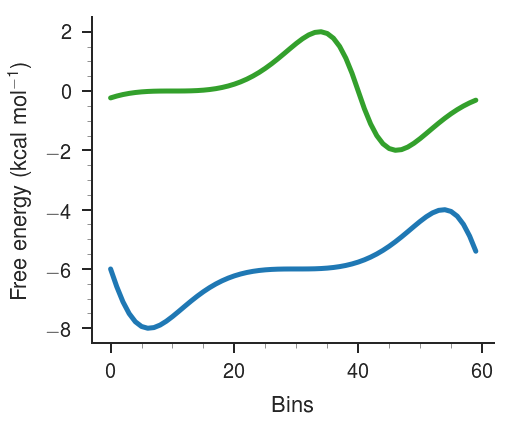

In [605]:
this = Simulation(data_source='manual')
bins = 60

x = np.linspace(-np.pi**(1/3), np.pi**(1/3) - 0.0488197295853841, 60)
bound = 2 * np.sin(x**3)
apo = np.hstack((bound[20:60], bound[0:20]))
bound = bound - 4
bound = bound - 2

this.cSubstrate = 10**-3
this.catalytic_rate = 312
this.unbound = apo
this.bound = bound
this.C_intersurface = +1.00e+06
this.simulate(user_energies=True)

fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2, 6))
ax1.plot(bound, c=cmap[1])
ax1.plot(apo, c=cmap[3])
ax1.set_ylabel('Free energy (kcal mol$^{-1}$)')
ax1.set_xlabel('Bins')
paper_plot(fig)

## Put the apo population on the bound energy surface and watch it evolve...

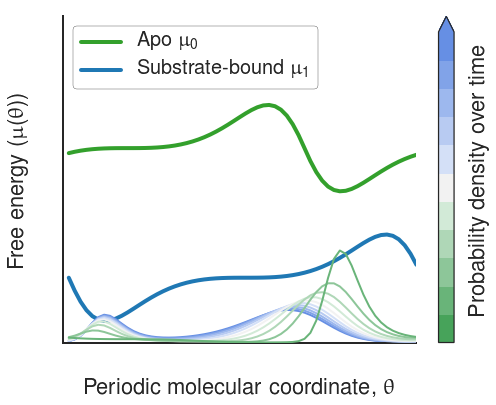

In [606]:
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2*1.1, 6))
ax1.plot(range(this.bins, 2*this.bins), this.unbound, c=cmap[3], lw=4, label=r'Apo $\mu_0$')
ax1.plot(range(this.bins, 2*this.bins), this.bound, c=cmap[1], lw=4, label=r'Substrate-bound $\mu_1$')
ax1.set_ylabel(r'Free energy ($\mu(\theta)$)')
ax1.tick_params('y', colors=cmap[1])
ax1.set_ylim([-9, 6.1])
ax1.set_yticklabels([])

ax1.set_xlabel(r'Periodic molecular coordinate, $\theta$')
ax1.set_xlim([59, 119])
ax1.set_xticklabels([])

from matplotlib.colors import ListedColormap
sm = plt.cm.ScalarMappable(cmap=ListedColormap(clrs),
                           norm=plt.Normalize(vmin=0, vmax=11))
sm._A = []
cbar = plt.colorbar(sm, ticks=[], orientation='vertical', pad=0.05, extend='max')

ax2 = ax1.twinx()
ax2.set_ylabel('Probability distribution (filled)')
ax2.tick_params('y', colors=cmap[3])

response = np.zeros((2*this.bins))
response[this.bins:2*this.bins] = this.PDF_unbound

iterations = 10**3
clrs = sns.diverging_palette(133, 255, l=60, n=11, center="light")
index = 0
for iteration in range(iterations):
    response = np.dot(response, this.tm)
    if iteration % 100 == 0:
        index = index + 1
        #ax2.plot(range(this.bins, 2*this.bins), response[this.bins:2*this.bins], 
        #         c=clrs[index], lw=3, alpha=1.0)
#        ax2.fill_between(range(this.bins, 2*this.bins), 0, response[this.bins:2*this.bins], 
#                 color=clrs[index], alpha=0.4, zorder=11-index)
#        ax2.fill_between(range(this.bins, 2*this.bins), 0, response[this.bins:2*this.bins], 
#                 color=clrs[index], alpha=0.2)


        ax2.plot(range(this.bins, 2*this.bins), response[this.bins:2*this.bins], 
                 c=clrs[index], lw=2, alpha=1.0, zorder=11-index)

ax2.set_ylim([0, 0.4])
ax2.set_yticklabels([])
ax2.set_xlim([59, 119])
ax1.legend(loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')



paper_plot(fig)
ax2.yaxis.set_ticks_position('right')
ax2.spines["right"].set_visible(False)
ax2.set_ylabel('')
ax1.minorticks_off()
ax2.minorticks_off()
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none') 
# cbar.ax.set_xticklabels(['Probability flow'])
cbar.set_label('Probability density over time')


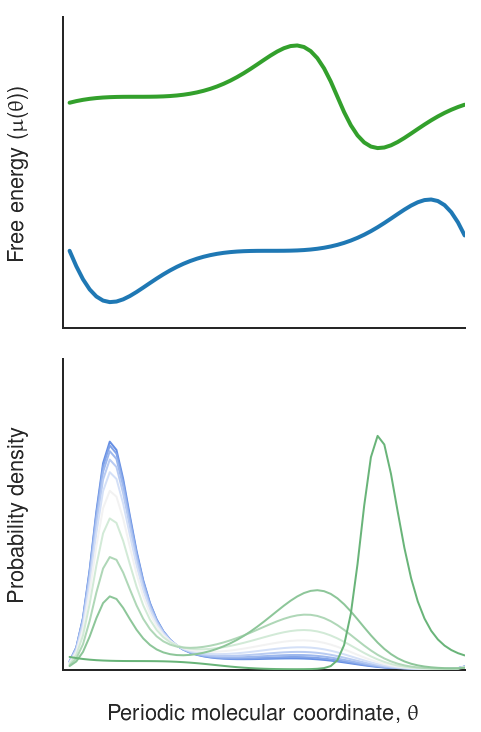

In [607]:
fig, ax = plt.subplots(2, 1, figsize=(6*1.2, 12))
ax1 = ax[0]
ax1.plot(range(this.bins, 2*this.bins), this.unbound, c=cmap[3], lw=4, label=r'Apo $\mu_0$')
ax1.plot(range(this.bins, 2*this.bins), this.bound, c=cmap[1], lw=4, label=r'Substrate-bound $\mu_1$')

ax1.set_ylabel(r'Free energy ($\mu(\theta)$)')
ax1.tick_params('y', colors=cmap[1])
ax1.set_ylim([-9, 3.1])
ax1.set_yticklabels([])
ax1.set_xlim([59, 119])
ax1.set_xticklabels([])
# ax1.legend(loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')

ax2 = ax[1]
response = np.zeros((2*this.bins))
response[this.bins:2*this.bins] = this.PDF_unbound
iterations = 10**4
clrs = sns.diverging_palette(133, 255, l=60, n=11, center="light")
index = 0
for iteration in range(iterations):
    response = np.dot(response, this.tm)
    if iteration % 1000 == 0:
        index = index + 1
        ax2.plot(range(this.bins, 2*this.bins), response[this.bins:2*this.bins], 
                 c=clrs[index], lw=2, alpha=1.0, zorder=11-index)

ax2.set_ylim([0, 0.15])
ax2.set_xlim([59, 119])
ax2.set_ylabel(r'Probability density')
ax2.set_xlabel(r'Periodic molecular coordinate, $\theta$')
ax2.set_xticklabels([])
ax2.set_yticklabels([])



paper_plot(fig)
ax1.minorticks_off()
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 
ax2.minorticks_off()
ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none') 
plt.subplots_adjust(hspace=0.1)

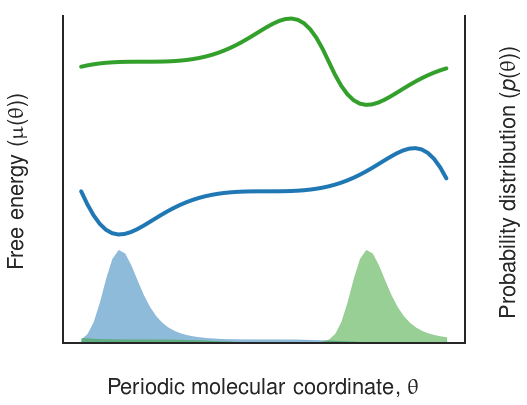

In [608]:
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2, 6))
ax1.plot(range(this.bins, 2*this.bins), this.bound, c=cmap[1], lw=4)
ax1.plot(range(this.bins, 2*this.bins), this.unbound, c=cmap[3], lw=4)
ax1.set_ylabel(r'Free energy ($\mu(\theta)$)')
ax1.tick_params('y', colors=cmap[1])
ax1.set_ylim([-13, 2.1])
ax1.set_yticklabels([])

ax1.set_xlabel(r'Periodic molecular coordinate, $\theta$')
ax1.set_xlim([60, 120])
ax1.set_xticklabels([])

ax2 = ax1.twinx()
ax2.set_ylabel(r'Probability distribution ($p(\theta)$)')
ax2.tick_params('y', colors=cmap[3])
# ax2.fill_between(range(this.bins, 2*this.bins), 0, this.ss[this.bins: 2*this.bins], alpha=0.5, color=cmap[1])
# ax2.fill_between(range(this.bins, 2*this.bins), 0, this.ss[0:this.bins], alpha=0.5, color=cmap[3])

ax2.fill_between(range(this.bins, 2*this.bins), 0, this.PDF_bound, alpha=0.5, color=cmap[1])
ax2.fill_between(range(this.bins, 2*this.bins), 0, this.PDF_unbound, alpha=0.5, color=cmap[3])

ax2.set_ylim([0, 0.4])
ax2.set_yticklabels([])

paper_plot(fig)
ax2.yaxis.set_ticks_position('right')
ax2.spines["right"].set_visible(True)
ax1.minorticks_off()
ax2.minorticks_off()
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none') 